In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib

from xgboost import plot_importance
from xgboost import XGBClassifier
#데이터 scaling
from sklearn.preprocessing import StandardScaler
#데이터 분할:train, test
from sklearn.model_selection import train_test_split
#분류 SVM
from sklearn.svm import SVC
#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

#분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import accuracy_score, f1_score, precision_score,\
recall_score, roc_auc_score, confusion_matrix, classification_report

#한글 폰트 적용
matplotlib.rc("font", family = "Noto Sans CJK JP")

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('final_df_all_ver0.4.csv')
df

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,...,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count,income_ind_grp
0,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,...,79.0,0.0,2.0,0.0,5700000.0,70300000.0,8.108108,9.0,1.0,300-399만원
1,C-1002,C05,484,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,...,6.0,350000.0,0.0,0.0,0.0,3150000.0,0.000000,2.0,0.0,200-299만원
2,C-1003,C05,478,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,...,79.0,0.0,0.0,0.0,0.0,391000000.0,0.000000,5.0,0.0,500-599만원
3,C-1004,C05,445,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,...,5.0,0.0,0.0,0.0,0.0,590000.0,0.000000,2.0,0.0,100-199만원
4,C-1005,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,...,40.0,0.0,0.0,0.0,0.0,367200000.0,0.000000,4.0,0.0,300-399만원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,C-2993,C04,398,여성,35,30대,사무직,전문대학 졸업,전세,아파트,...,17.0,0.0,0.0,0.0,0.0,7900000.0,0.000000,2.0,0.0,200-299만원
1425,C-2994,C05,468,남성,42,40대,기능/노무직,전문대학 졸업,전세,아파트,...,25.0,0.0,6.0,0.0,500000.0,1360000.0,36.764706,1.0,1.0,100-199만원
1426,C-2995,C06,528,여성,39,30대,전업주부,전문대학 졸업,자가,아파트,...,150.0,16600000.0,0.0,0.0,0.0,61340000.0,0.000000,17.0,0.0,200-299만원
1427,C-2996,C05,448,남성,41,40대,사무직,대학교 졸업,자가,단독주택,...,29.0,0.0,0.0,0.0,0.0,68000000.0,0.000000,2.0,0.0,200-299만원


In [3]:
df.columns

Index(['chaju_id', 'credit_class', 'score_risk', 'gender', 'age', 'agegroup',
       'job', 'edu', 'dwell_type', 'house_type', 'marriage', 'income_home_grp',
       'expenditure_grp', 'child_cd', 'no_child', 'flag_priv_biz_cd',
       'card_count', 'card_period', 'loan_period', 'Pcard_loan_amt',
       'over_period', 'Pcard_over_amt', 'over_amt', 'loan_amt_final2',
       'del_rate', 'loan_count', 'overdue_count', 'income_ind_grp'],
      dtype='object')

y = loan_amt * loan_period / del_rate

In [4]:
df['del_rate'].describe()

count    1429.000000
mean       17.215474
std        33.514757
min         0.000000
25%         0.000000
50%         0.000000
75%        10.749186
max       100.000000
Name: del_rate, dtype: float64

In [5]:
df[df['del_rate']>0]

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,...,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count,income_ind_grp
0,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,...,79.0,0.0,2.0,0.0,5700000.0,70300000.0,8.108108,9.0,1.0,300-399만원
13,C-1019,C07,668,남성,47,40대,무직/기타,대학교 졸업,자가,아파트,...,53.0,0.0,72.0,0.0,292900000.0,322800000.0,90.737299,3.0,4.0,200-299만원
21,C-1029,C05,451,여성,52,50대,판매/서비스직,고등학교 졸업,자가,아파트,...,10.0,0.0,5.0,0.0,880000.0,2380000.0,36.974790,2.0,1.0,100-199만원
22,C-1030,C03,288,남성,43,40대,사무직,대학교 졸업,자가,아파트,...,0.0,0.0,12.0,0.0,8000000.0,8000000.0,100.000000,0.0,1.0,100-199만원
26,C-1036,C05,454,남성,64,60대,기능/노무직,고등학교 졸업,자가,아파트,...,0.0,0.0,25.0,0.0,95000000.0,0.0,100.000000,0.0,1.0,300-399만원
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,C-2972,C06,588,남성,49,40대,행정관리/전문직,대학원 졸업,자가,단독주택,...,39.0,0.0,64.0,0.0,54170000.0,68670000.0,78.884520,8.0,6.0,100-199만원
1416,C-2984,C05,491,여성,50,50대,기능/노무직,고등학교 졸업,자가,아파트,...,23.0,0.0,43.0,0.0,2110000.0,10810000.0,19.518964,1.0,2.0,200-299만원
1419,C-2987,C06,508,남성,39,30대,사무직,대학교 졸업,자가,아파트,...,76.0,0.0,56.0,0.0,19230000.0,33250000.0,57.834586,4.0,5.0,200-299만원
1423,C-2992,C04,338,남성,46,40대,사무직,대학교 졸업,자가,단독주택,...,0.0,0.0,25.0,0.0,9600000.0,9600000.0,100.000000,0.0,1.0,200-299만원


In [6]:
df.loc[df['del_rate']>0,'label'] = 1
df.loc[df['del_rate']==0,'label'] = 0

In [7]:
df

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,...,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count,income_ind_grp,label
0,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,...,0.0,2.0,0.0,5700000.0,70300000.0,8.108108,9.0,1.0,300-399만원,1.0
1,C-1002,C05,484,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,...,350000.0,0.0,0.0,0.0,3150000.0,0.000000,2.0,0.0,200-299만원,0.0
2,C-1003,C05,478,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,...,0.0,0.0,0.0,0.0,391000000.0,0.000000,5.0,0.0,500-599만원,0.0
3,C-1004,C05,445,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,...,0.0,0.0,0.0,0.0,590000.0,0.000000,2.0,0.0,100-199만원,0.0
4,C-1005,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,...,0.0,0.0,0.0,0.0,367200000.0,0.000000,4.0,0.0,300-399만원,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,C-2993,C04,398,여성,35,30대,사무직,전문대학 졸업,전세,아파트,...,0.0,0.0,0.0,0.0,7900000.0,0.000000,2.0,0.0,200-299만원,0.0
1425,C-2994,C05,468,남성,42,40대,기능/노무직,전문대학 졸업,전세,아파트,...,0.0,6.0,0.0,500000.0,1360000.0,36.764706,1.0,1.0,100-199만원,1.0
1426,C-2995,C06,528,여성,39,30대,전업주부,전문대학 졸업,자가,아파트,...,16600000.0,0.0,0.0,0.0,61340000.0,0.000000,17.0,0.0,200-299만원,0.0
1427,C-2996,C05,448,남성,41,40대,사무직,대학교 졸업,자가,단독주택,...,0.0,0.0,0.0,0.0,68000000.0,0.000000,2.0,0.0,200-299만원,0.0


In [8]:
df.columns

Index(['chaju_id', 'credit_class', 'score_risk', 'gender', 'age', 'agegroup',
       'job', 'edu', 'dwell_type', 'house_type', 'marriage', 'income_home_grp',
       'expenditure_grp', 'child_cd', 'no_child', 'flag_priv_biz_cd',
       'card_count', 'card_period', 'loan_period', 'Pcard_loan_amt',
       'over_period', 'Pcard_over_amt', 'over_amt', 'loan_amt_final2',
       'del_rate', 'loan_count', 'overdue_count', 'income_ind_grp', 'label'],
      dtype='object')

In [9]:
df_new = df.drop(['card_count', 'card_period','chaju_id','credit_class','score_risk','Pcard_loan_amt', 'loan_period',
       'over_period', 'Pcard_over_amt', 'over_amt', 'del_rate','loan_amt_final2','loan_count', 'overdue_count'
                     ],axis=1)

In [10]:
df_new.columns

Index(['gender', 'age', 'agegroup', 'job', 'edu', 'dwell_type', 'house_type',
       'marriage', 'income_home_grp', 'expenditure_grp', 'child_cd',
       'no_child', 'flag_priv_biz_cd', 'income_ind_grp', 'label'],
      dtype='object')

In [11]:
df_dummy = pd.get_dummies(df_new)
df_raw_y = df_dummy["label"]
df_raw_x = df_dummy.drop("label", axis = 1, inplace = False)

In [15]:
df_train_x, df_test_x, df_train_y, df_test_y  = train_test_split(df_raw_x,df_raw_y,test_size = 0.3)
xgb_final = XGBClassifier(max_depth = 8, 
                          n_estimators = 100,
                          learning_rate= .08)
xgb_final.fit(df_train_x,df_train_y)
y_pred = xgb_final.predict(df_test_x)
print("Accuracy on training set:{:3f}".format(xgb_final.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:3f}".format(xgb_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,digits=3))

[05:14:45] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on training set:0.854000
Accuracy on test set:0.664336
Confusion matrix:
[[265  35]
 [109  20]]
              precision    recall  f1-score   support

         0.0      0.709     0.883     0.786       300
         1.0      0.364     0.155     0.217       129

    accuracy                          0.664       429
   macro avg      0.536     0.519     0.502       429
weighted avg      0.605     0.664     0.615       429



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

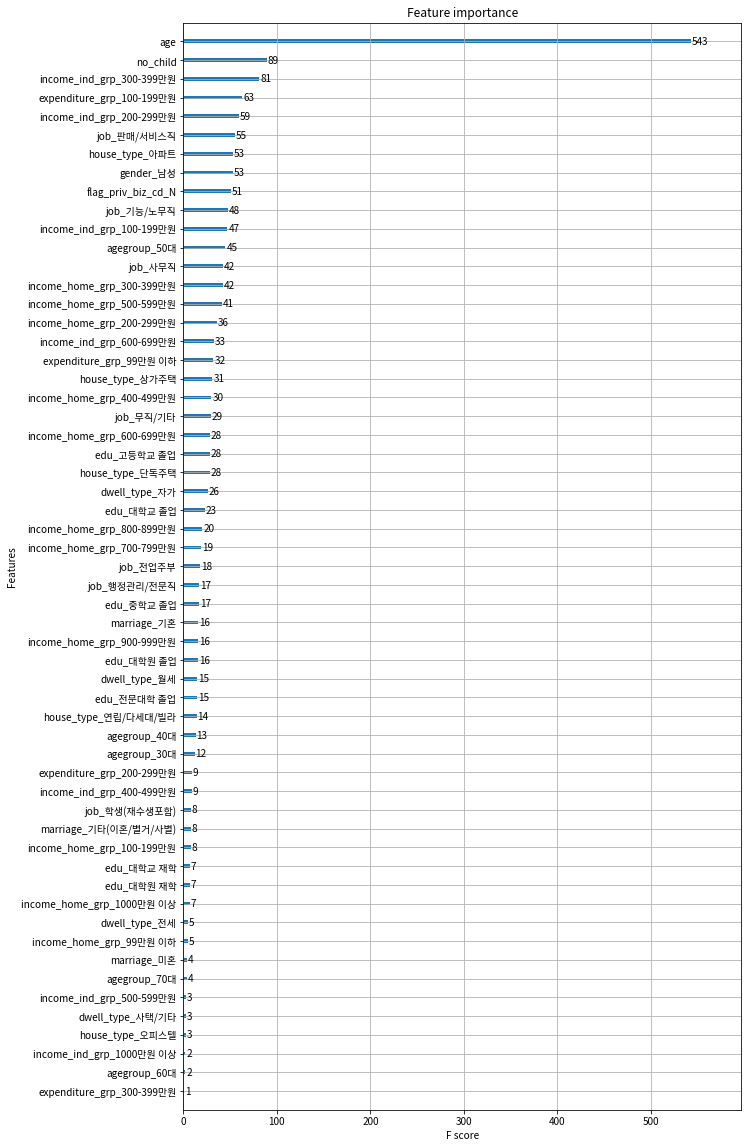

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,20))
plot_importance(xgb_final, ax = ax)

In [14]:
y_pred

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.